#**Stock Prediction analysis**

##Team: The Mean Squares

1. Jeyasri Subramanian [SJSU ID: 014510132]
2. Subarna Chowdhury Soma [SJSU ID: 014549587]
3. Pranav Lodha [SJSU ID: 009468121]
4. Wasae Qureshi [SJSU ID: 014569880]

##**Contributions:**

1. Logistic Regression **[Pranav & Wasae]**
2. AutoML implementation **[Subarna & Jeyasri]** 
3. Data insights **[ Team]**

#Data Analysis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import metrics 

##Mount Google drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Printing directory details
!ls '/content/drive/My Drive/MLSpring2020/TheMeanSquares-StockPrediction'

 all_stocks_date.csv   Assignment-8
 Assignment-1	       compressed_financial_stmt.csv
 Assignment-2	       computed_data.csv
 Assignment-3	       computed_results.csv
 Assignment-4	       march_01_2020_complete_data.csv
 Assignment-5	       Presentation
 Assignment-6	      'ProjectRecording- March10'
 Assignment-7	       stock_summary_data_28_02_2020_16_46_36.csv


##**Load Dataset**


In [0]:
stock_data =  pd.read_csv('/content/drive/My Drive/MLSpring2020/TheMeanSquares-StockPrediction/march_01_2020_complete_data.csv', low_memory =False)
stock_data.tail()

,net_profit_AYR,net_income_AYR,sector_code,stock_code,avg_yearly_returns,yearly_variance,percent_change_net_income,overall_change_market_cap,cluster,stability
2751,-0.050506,0.054548,6,4392,0.112394,0.034901,28951.430260,101.257690,0,0
2752,-0.100119,-0.041285,10,4395,-0.042532,0.014479,-2808.384525,214.225315,0,0
2753,0.000000,0.000000,7,4396,0.833954,1.018350,-5990.962632,-67.921273,0,0
2754,-1.231558,-2.824307,7,4397,0.034941,0.446001,-9628.641185,-17.590812,0,0
2755,-0.571686,-0.576552,1,4372,0.161969,0.107521,-100.000000,150.065980,0,0


#Determine Data Correlation

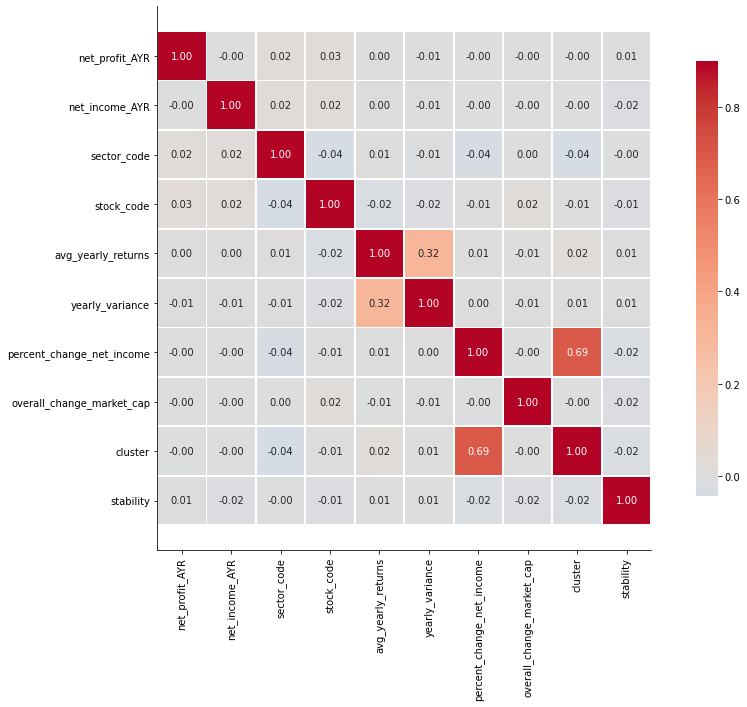

In [0]:
corr = stock_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [0]:
print(stock_data.shape)

(2756, 10)


#Splitting data for modeling

In [0]:
Y = stock_data['stability']
# X = stock_data[['cluster', 'percent_change_net_income', 'avg_yearly_returns', 'yearly_variance', 'sector_code', 'net_profit_AYR']]
X= stock_data[['percent_change_net_income', 'avg_yearly_returns', 'yearly_variance', 'net_profit_AYR','sector_code','stock_code']]
#X = stock_data[['percent_change_net_income']]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression


In [0]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logistic_regression.predict(x_test)
predictions.shape

(552,)

In [0]:
score = logistic_regression.score(x_test, y_test)
print(score)

0.5289855072463768


#AutoML

## Randomized Search Model selection

In [0]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

In [0]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [0]:
clf = SGDClassifier(loss='hinge', penalty='elasticnet',
                    fit_intercept=True)
param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

In [0]:
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [0]:
start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


RandomizedSearchCV took 1.70 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.546 (std: 0.010)
Parameters: {'alpha': 0.0006387726046474744, 'average': True, 'l1_ratio': 0.3732907349504797}

Model with rank: 1
Mean validation score: 0.546 (std: 0.007)
Parameters: {'alpha': 0.02295590175270513, 'average': False, 'l1_ratio': 0.18250984262439274}

Model with rank: 3
Mean validation score: 0.545 (std: 0.009)
Parameters: {'alpha': 0.036049337872988266, 'average': True, 'l1_ratio': 0.11201784479217147}



In [0]:

param_grid = {'average': [True, False],
              'l1_ratio': np.linspace(0, 1, num=10),
              'alpha': np.power(10, np.arange(-4, 1, dtype=float))}

In [0]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, Y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='elasticnet', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'average': [True, False],
                         'l1_ratio': array([0.        , 0.111111

In [0]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 9.36 seconds for 100 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.548 (std: 0.009)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.1111111111111111}

Model with rank: 2
Mean validation score: 0.547 (std: 0.011)
Parameters: {'alpha': 0.0001, 'average': True, 'l1_ratio': 0.6666666666666666}

Model with rank: 3
Mean validation score: 0.547 (std: 0.010)
Parameters: {'alpha': 0.1, 'average': True, 'l1_ratio': 0.6666666666666666}



##Lasso Linear model selection

In [0]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [0]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

In [0]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
start = time()

clf.fit(X, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))
report(clf.cv_results_)

GridSearchCV took 1.14 seconds for 30 candidate parameter settings.
Model with rank: 1
Mean validation score: -0.055 (std: 0.089)
Parameters: {'alpha': 0.31622776601683794}

Model with rank: 2
Mean validation score: -0.055 (std: 0.088)
Parameters: {'alpha': 0.2395026619987486}

Model with rank: 3
Mean validation score: -0.055 (std: 0.088)
Parameters: {'alpha': 0.1813930693911063}



(0.0001, 0.31622776601683794)

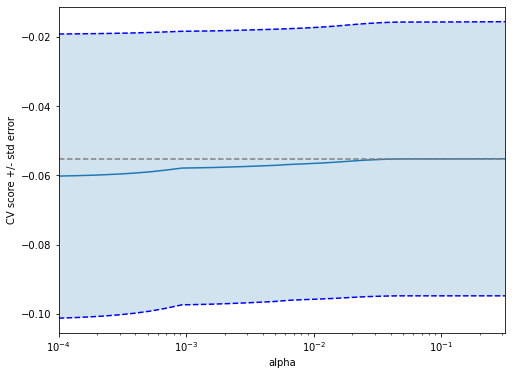

In [0]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

##Comparison of various linear classifiers


In [0]:
# Compare Algorithms

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [0]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.524303 (0.042579)
LDA: 0.506891 (0.035525)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.846163 (0.031309)
CART: 0.902395 (0.014356)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.757958 (0.035371)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.514867 (0.044189)


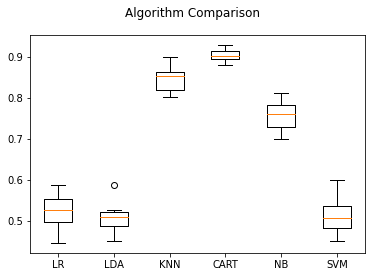

In [0]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Data Insights


### Logistic Regression
We used the same dataset from Decision Tree assignment to apply logistic regression to classify stable and unstables stocks.

We loaded in the data and immediately applied the feature correlation heatmap to see which features could help us in the classification. We noticed that cluster and percent_change_net_income were highly correlated. We initially applied logistic regression on each feature against stability. Our results showed that percent_change_net_income would accurately classify the stocks as stable/unstable 54%. The second best after that being the 'cluster' feature with 50%. Doing a combination of these features didn't improve the accuracy. 

Since the stability of stock feature is derived from density based clustering,this feature doesn't have any linear relationship with any other feature. Hence Linear classifier modeling will not solve this problem.

### AutoML
Using RandomGridSearchCV library, we have implemented to verify the results of linear modeling for 20 iterations. Top ranked model is returned with accuracy 52%. We verified Lasso Regularization for the data using GridSearchCV for various alpha values. Top ranked model returns with mean validation score of -0.055. After plotting the alpha values versus CV score, the cross validation score varies from -0.1 to -0.02. 

###Model accuracy comparison
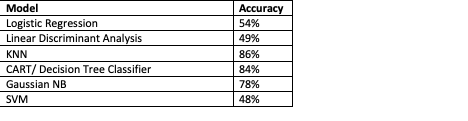

##Impact on Project
This week, we focused on linear modeling to classify stability of stocks using available features. We did compare accuracy of various linear classifier models. From the results, it’s very clear our features are not linearly separable. From the above table, the stability of stocks feature can be classified using distance-based modeling such as KNN or entropy-based modeling such as decision tree or conditional probability modeling such as Gaussian NB.
Our planned work for this week, is to determine more features from financial news dataset in correlation with stock data. We will continue enriching the features to classify high stability stocks in each sector with more accuracy.


#Reference

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8